# Activation Functions

The output layer also has its own activation function, but it serves a different purpose. If you recall from Chapter 3, Making Decisions with Linear Equations, we used the logistic function to turn a linear regression into a classifier—that is, logistic regression. The output's activation function serves the exact same purpose here as well. This list has the possible output activation functions and their corresponding use cases:
- Identity function: Set when doing regression using MLPRegressor 
- Logistic function: Set when performing a binary classification using MLPClassifier
- Softmax function: Set when using MLPClassifier to differentiate between three or more classes 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

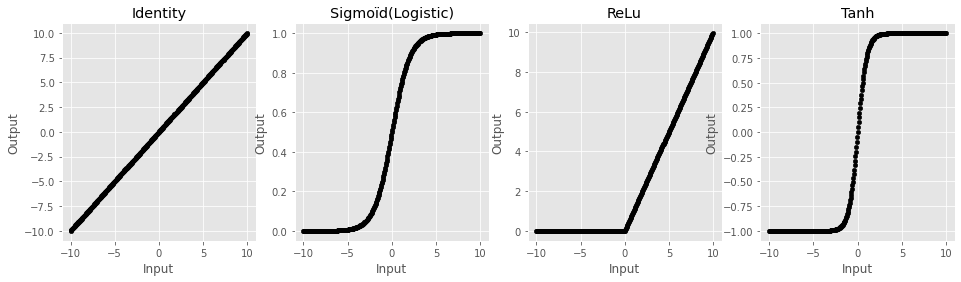

In [5]:
fig, axs = plt.subplots(1,4, figsize=(16,4))

theta = np.arange(-10, 10, 0.05)
# Identity function
identity = theta
# Sigmoïd (logistic) function
sigmoid = 1 / (1 + np.exp(-1 * theta))
# Relu function
relu = np.maximum(0, theta)
# tanh function
tan_h = np.tanh(theta)

# Plotting different functions
pd.DataFrame(
    {
        'theta': theta,
     'identity': identity,
    }
).plot(
    title='Identity',
    kind='scatter',
    x='theta', y='identity',
    color='k',
    ax=axs[0]
)


pd.DataFrame(
    {
        'theta': theta,
     'sigmoid': sigmoid,
    }
).plot(
    title='Sigmoïd(Logistic)',
    kind='scatter',
    x='theta', y='sigmoid',
    color='k',
    ax=axs[1]
)

pd.DataFrame(
    {
        'theta': theta,
     'relu': relu,
    }
).plot(
    title='ReLu',
    kind='scatter',
    x='theta', y='relu',
    color='k',
    ax=axs[2]
)

pd.DataFrame(
    {
        'theta': theta,
     'tanh': tan_h,
    }
).plot(
    title='Tanh',
    kind='scatter',
    x='theta', y='tanh',
    color='k',
    ax=axs[3]
)

for i in range(4):
    axs[i].set_xlabel('Input')
    axs[i].set_ylabel('Output')

fig.show()


# RELU

In [6]:
def leaky_relu(X):
    x_min = 0.1 * np.array(X)
    return np.clip(X, x_min, np.finfo(X.dtype).max)

def inplace_leaky_relu_derivative(Z, delta):
    delta[Z == 0] = 0.1

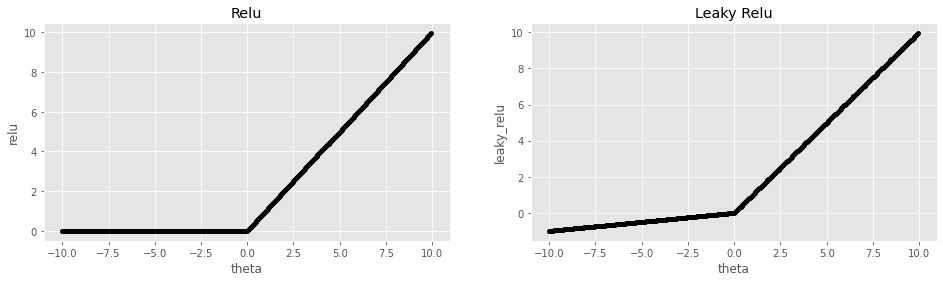

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

theta = np.arange(-10, 10, 0.05)
lrelu = leaky_relu(theta)
relu = np.maximum(0, theta)

pd.DataFrame(
    {
        'theta': theta,
        'relu': relu
    }
).plot(
    title='Relu', 
    kind='scatter', x='theta', y='relu', 
    color='k',
    ax=axs[0]
)


pd.DataFrame(
    {
        'theta': theta,
        'leaky_relu': lrelu
    }
).plot(
    title='Leaky Relu', 
    kind='scatter', x='theta', y='leaky_relu', 
    color='k',
    ax=axs[1]
)

# Convex Function

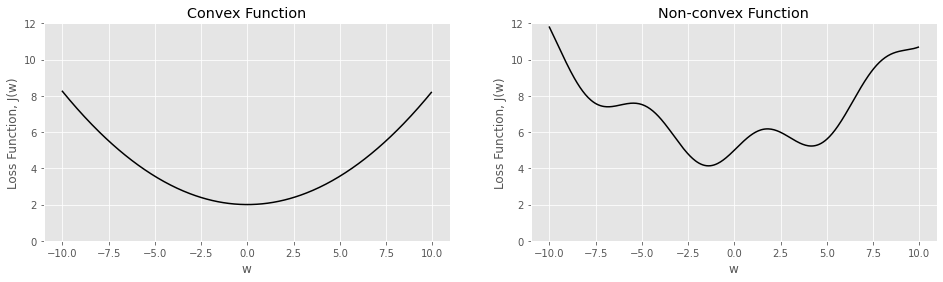

In [8]:
w = np.arange(-10, 10, 0.05)
y1 = np.sin(w)
y2 = 2 + (0.25*w)**2
y3 = (0.01*w) ** 3

y_convex = y2
y_nonconvex = 3 + y1 + y2 + y3


fig, axs = plt.subplots(1, 2, figsize=(16, 4))

pd.DataFrame(
    {
        'w': w,
        'y': y_convex,
    }
).set_index('w')['y'].plot(
    title='Convex Function',
    ylim=(0,12),
    color='k',
    ax=axs[0]
)

axs[0].set_ylabel('Loss Function, J(w)')

pd.DataFrame(
    {
        'w': w,
        'y': y_nonconvex,
    }
).set_index('w')['y'].plot(
    title='Non-convex Function',
    ylim=(0,12),
    color='k',
    ax=axs[1]
)

axs[1].set_ylabel('Loss Function, J(w)')



fig.show()